In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep
hep.style.use("CMS")

In [175]:
fileNames = glob.glob("/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/genMatched/GluGlu*.parquet")
df = pd.read_parquet(fileNames)
#df = df[(df.jet1_pt>20) & (df.jet2_pt>20)]

In [176]:
print(df.correctChoice.sum()/len(df))


0.6443957177866633


/work/gcelotto/miniconda3/envs/myenv/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7001: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


Text(1, 0, 'Correct Choice')

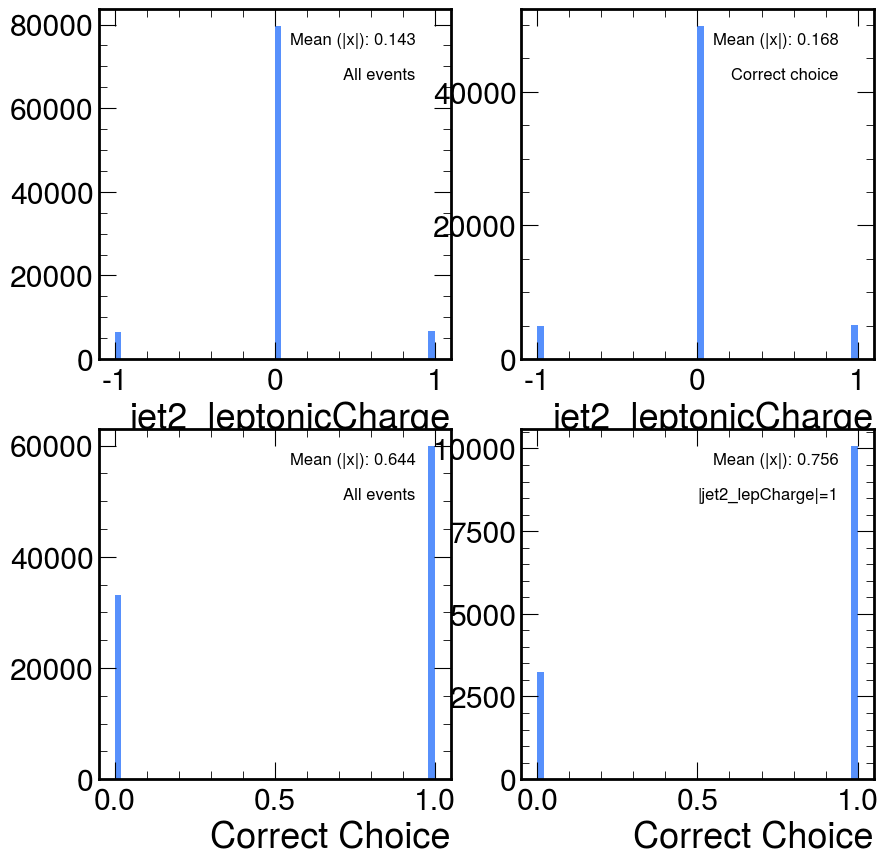

In [177]:
from scipy.optimize import curve_fit

fig, ax = plt.subplots(2, 2, figsize=(10,10))
bins=np.linspace(-1, 1, 51)
ax[0,0].hist(df.jet2_leptonicCharge, bins=bins)
ax[0,0].text(x=0.9,y=0.9, s="Mean (|x|): %.3f"%(abs(df.jet2_leptonicCharge).mean()), ha='right', transform=ax[0,0].transAxes, fontsize=12)
ax[0,0].text(x=0.9,y=0.8, s="All events", ha='right', transform=ax[0,0].transAxes, fontsize=12)
ax[0,0].set_xlabel("jet2_leptonicCharge")
ax[0,1].hist(df.jet2_leptonicCharge[df.correctChoice==True], bins=bins)
ax[0,1].text(x=0.9,y=0.9, s="Mean (|x|): %.3f"%(abs(df.jet2_leptonicCharge[df.correctChoice==True]).mean()), ha='right', transform=ax[0,1].transAxes, fontsize=12)
ax[0,1].text(x=0.9,y=0.8, s="Correct choice", ha='right', transform=ax[0,1].transAxes, fontsize=12)
ax[0,1].set_xlabel("jet2_leptonicCharge")

bins=np.linspace(0, 1, 51)
ax[1,0].hist(df.correctChoice, bins=bins)
ax[1,0].text(x=0.9,y=0.9, s="Mean (|x|): %.3f"%(abs(df.correctChoice).mean()), ha='right', transform=ax[1,0].transAxes, fontsize=12)
ax[1,0].text(x=0.9,y=0.8, s="All events", ha='right', transform=ax[1,0].transAxes, fontsize=12)
ax[1,0].set_xlabel("Correct Choice")

ax[1,1].hist(df.correctChoice[abs(df.jet2_leptonicCharge)==1], bins=bins)
ax[1,1].text(x=0.9,y=0.9, s="Mean (|x|): %.3f"%(abs(df.correctChoice[abs(df.jet2_leptonicCharge)==1]).mean()), ha='right', transform=ax[1,1].transAxes, fontsize=12)
ax[1,1].text(x=0.9,y=0.8, s="|jet2_lepCharge|=1", ha='right', transform=ax[1,1].transAxes, fontsize=12)
ax[1,1].set_xlabel("Correct Choice")

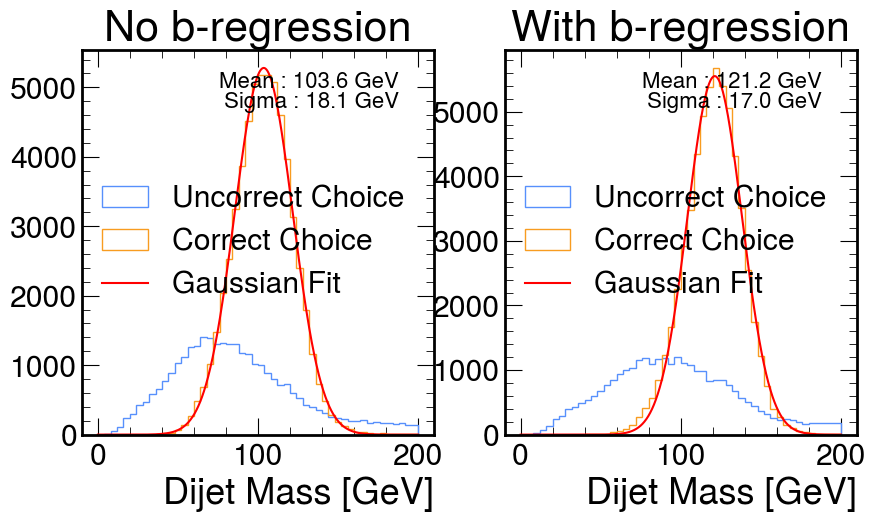

In [178]:
fig, ax =plt.subplots(1, 2, figsize=(10,5))
bins=np.linspace(0, 200, 51)
ax[0].hist(df.dijet_mass[df.correctChoice==False], bins=bins, histtype=u'step', label="Uncorrect Choice")
ax[0].hist(df.dijet_mass[df.correctChoice==True], bins=bins, histtype='step', label="Correct Choice")
hist, bins = np.histogram(df.dijet_mass[df.correctChoice==True], bins=bins)

bin_centers = (bins[:-1] + bins[1:]) / 2

# Gaussian function
def gaussian(x, amp, mu, sigma):
    return amp * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# Perform the Gaussian fit
popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=[np.max(hist), np.mean(df.dijet_mass[df.correctChoice==True]), np.std(df.dijet_mass[df.correctChoice==True])])



# Plot the Gaussian fit
x_fit = np.linspace(0, 200, 1000)
y_fit = gaussian(x_fit, *popt)
ax[0].plot(x_fit, y_fit, label='Gaussian Fit', color='red')
ax[0].set_label("Dijet Mass [GeV]")
ax[0].text(x=0.9,y=0.9,s="Mean : %.1f GeV"%popt[1], ha='right', transform=ax[0].transAxes, fontsize=16)
ax[0].text(x=0.9,y=0.85,s="Sigma : %.1f GeV"%popt[2], ha='right', transform=ax[0].transAxes, fontsize=16)
ax[0].set_title("No b-regression")
ax[0].set_xlabel("Dijet Mass [GeV]")
ax[0].legend()

# Repeat but with corrected dijet Mass
ax[1].hist(df.dijetCorr_mass[df.correctChoice==False], bins=bins, histtype=u'step', label="Uncorrect Choice")
ax[1].hist(df.dijetCorr_mass[df.correctChoice==True], bins=bins, histtype='step', label="Correct Choice")
hist, bins = np.histogram(df.dijetCorr_mass[df.correctChoice==True], bins=bins)

bin_centers = (bins[:-1] + bins[1:]) / 2
# Perform the Gaussian fit
popt, pcov = curve_fit(gaussian, bin_centers, hist, p0=[np.max(hist), np.mean(df.dijetCorr_mass[df.correctChoice==True]), np.std(df.dijetCorr_mass[df.correctChoice==True])])

# Plot the Gaussian fit
x_fit = np.linspace(0, 200, 1000)
y_fit = gaussian(x_fit, *popt)
ax[1].plot(x_fit, y_fit, label='Gaussian Fit', color='red')
ax[1].set_label("Dijet Mass [GeV]")
ax[1].text(x=0.9,y=0.9,s="Mean : %.1f GeV"%popt[1], ha='right', transform=ax[1].transAxes, fontsize=16)
ax[1].text(x=0.9,y=0.85,s="Sigma : %.1f GeV"%popt[2], ha='right', transform=ax[1].transAxes, fontsize=16)
ax[1].set_title("With b-regression")
ax[1].set_xlabel("Dijet Mass [GeV]")
ax[1].legend()

Text(0.5, 1.0, 'Jets pt > 20 - GenMatched Jets')

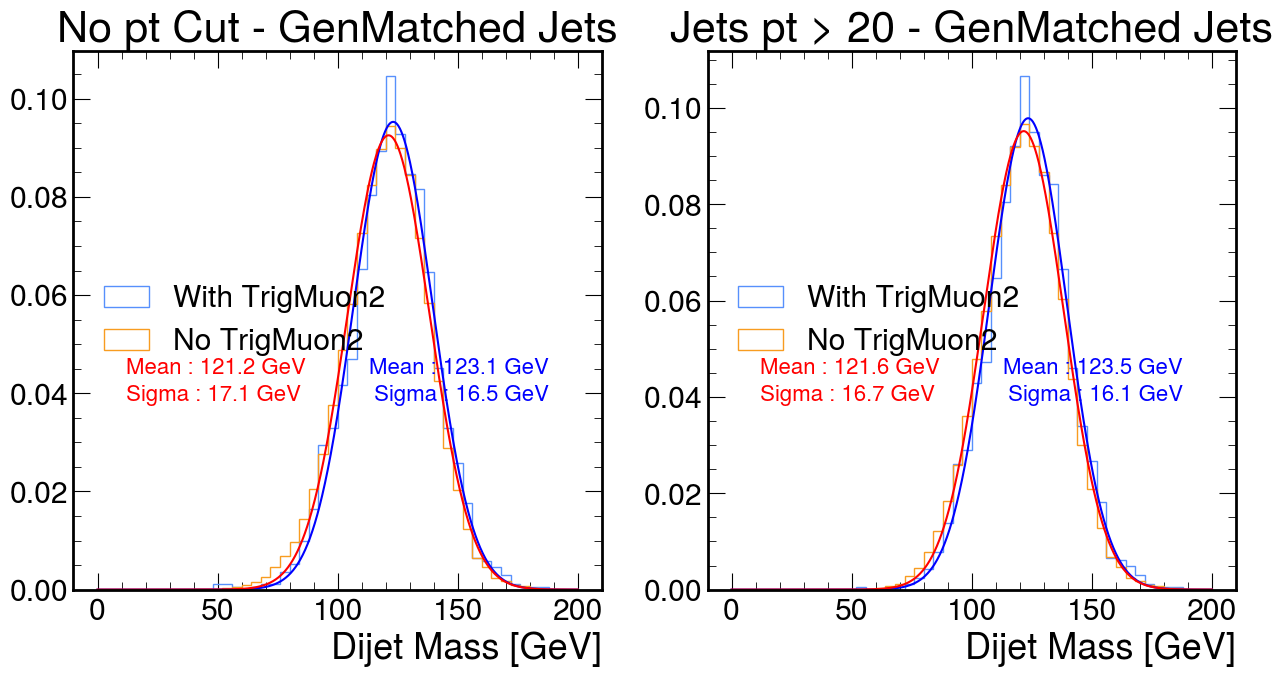

In [179]:
fig, ax =plt.subplots(1, 2, figsize=(15,7))
genM = (df.correctChoice==True)
bins=np.linspace(0, 200, 51)
# fit WIth TRIG MUON 2
hist, bins = np.histogram(df.dijetCorr_mass[(genM) & (df.muon2_charge!=999)], bins=bins)
hist=hist/np.sum(hist)
ax[0].hist(bins[:-1], bins=bins, weights=hist,histtype=u'step', label="With TrigMuon2")
bin_centers = (bins[:-1] + bins[1:]) / 2
popt_with, pcov = curve_fit(gaussian, bin_centers, hist, p0=[np.max(hist), np.mean(df.dijetCorr_mass[df.correctChoice==True]), np.std(df.dijetCorr_mass[df.correctChoice==True])])

hist, bins = np.histogram(df.dijetCorr_mass[(genM) & (df.muon2_charge==999)], bins=bins)
hist=hist/np.sum(hist)
ax[0].hist(bins[:-1], bins=bins, weights=hist, histtype='step', label="No TrigMuon2")
bin_centers = (bins[:-1] + bins[1:]) / 2
popt_without, pcov = curve_fit(gaussian, bin_centers, hist, p0=[np.max(hist), np.mean(df.dijetCorr_mass[df.correctChoice==True]), np.std(df.dijetCorr_mass[df.correctChoice==True])])

# Plot the Gaussian fit
x_fit = np.linspace(0, 200, 1000)
y_fit = gaussian(x_fit, *popt_with)
ax[0].plot(x_fit, y_fit, color='blue')
ax[0].text(x=0.9,y=0.4,s="Mean : %.1f GeV"%popt_with[1], ha='right', transform=ax[0].transAxes, fontsize=16, color='blue')
ax[0].text(x=0.9,y=0.35,s="Sigma : %.1f GeV"%popt_with[2], ha='right', transform=ax[0].transAxes, fontsize=16, color='blue')
ax[0].set_xlabel("Dijet Mass [GeV]")

y_fit = gaussian(x_fit, *popt_without)
ax[0].plot(x_fit, y_fit, color='red')
ax[0].text(x=0.1,y=0.4,s="Mean : %.1f GeV"%popt_without[1], ha='left', transform=ax[0].transAxes, fontsize=16, color='red')
ax[0].text(x=0.1,y=0.35,s="Sigma : %.1f GeV"%popt_without[2], ha='left', transform=ax[0].transAxes, fontsize=16, color='red')
ax[0].legend()
ax[0].set_title("No pt Cut - GenMatched Jets")

# ************************
# With pt cut
# ******************

ptM = (df.jet1_pt>20) & (df.jet2_pt>20)
hist, bins = np.histogram(df.dijetCorr_mass[(genM) & (ptM) & (df.muon2_charge!=999)], bins=bins)
hist=hist/np.sum(hist)
ax[1].hist(bins[:-1], bins=bins, weights=hist,histtype=u'step', label="With TrigMuon2")
bin_centers = (bins[:-1] + bins[1:]) / 2
popt_with, pcov = curve_fit(gaussian, bin_centers, hist, p0=[np.max(hist), np.mean(df.dijetCorr_mass[df.correctChoice==True]), np.std(df.dijetCorr_mass[df.correctChoice==True])])

hist, bins = np.histogram(df.dijetCorr_mass[(genM) & (ptM) &(df.muon2_charge==999)], bins=bins)
hist=hist/np.sum(hist)
ax[1].hist(bins[:-1], bins=bins, weights=hist, histtype='step', label="No TrigMuon2")
bin_centers = (bins[:-1] + bins[1:]) / 2
popt_without, pcov = curve_fit(gaussian, bin_centers, hist, p0=[np.max(hist), np.mean(df.dijetCorr_mass[df.correctChoice==True]), np.std(df.dijetCorr_mass[df.correctChoice==True])])

# Plot the Gaussian fit
x_fit = np.linspace(0, 200, 1000)
y_fit = gaussian(x_fit, *popt_with)
ax[1].plot(x_fit, y_fit, color='blue')
ax[1].text(x=0.9,y=0.4,s="Mean : %.1f GeV"%popt_with[1], ha='right', transform=ax[1].transAxes, fontsize=16, color='blue')
ax[1].text(x=0.9,y=0.35,s="Sigma : %.1f GeV"%popt_with[2], ha='right', transform=ax[1].transAxes, fontsize=16, color='blue')
ax[1].set_xlabel("Dijet Mass [GeV]")

y_fit = gaussian(x_fit, *popt_without)
ax[1].plot(x_fit, y_fit, color='red')
ax[1].text(x=0.1,y=0.4,s="Mean : %.1f GeV"%popt_without[1], ha='left', transform=ax[1].transAxes, fontsize=16, color='red')
ax[1].text(x=0.1,y=0.35,s="Sigma : %.1f GeV"%popt_without[2], ha='left', transform=ax[1].transAxes, fontsize=16, color='red')
ax[1].legend()
ax[1].set_title("Jets pt > 20 - GenMatched Jets")

Text(0.5, 1.0, 'Jets pt > 20 - GenMatched Jets')

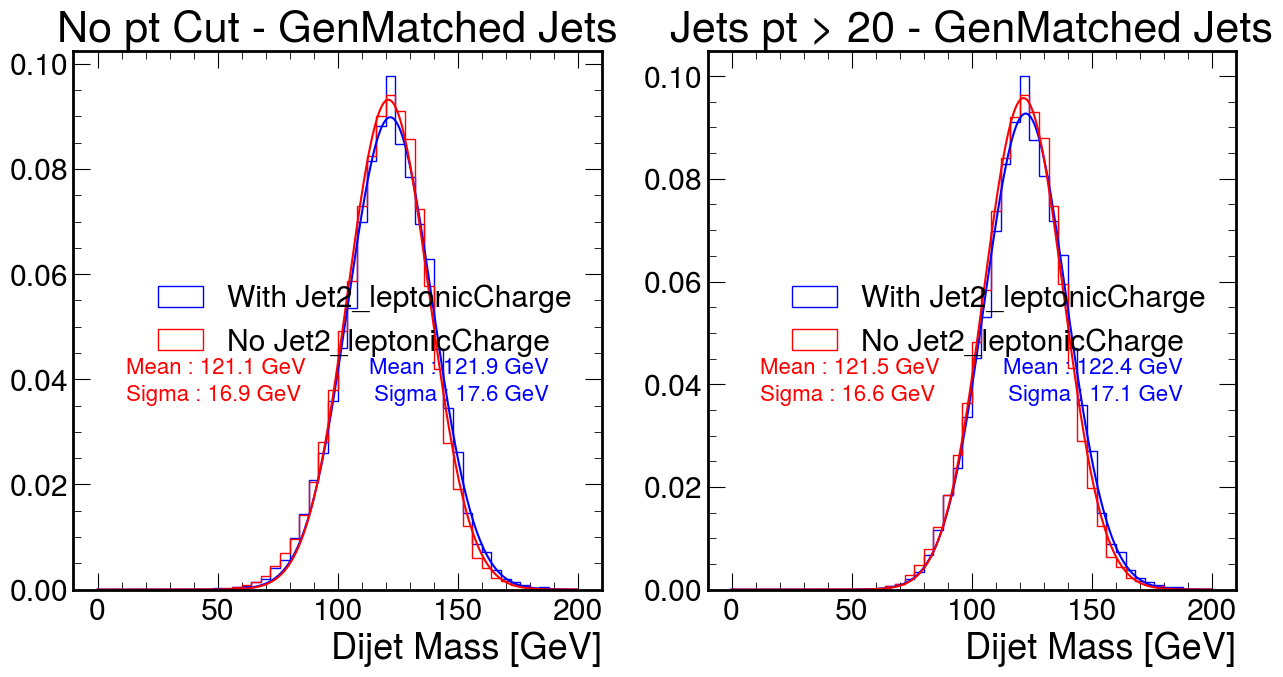

In [180]:
fig, ax =plt.subplots(1, 2, figsize=(15,7))
genM = (df.correctChoice==True)
bins=np.linspace(0, 200, 51)
# fit WIth TRIG MUON 2
hist, bins = np.histogram(df.dijetCorr_mass[(genM) & (df.jet2_leptonicCharge!=0)], bins=bins)
hist=hist/np.sum(hist)
ax[0].hist(bins[:-1], bins=bins, weights=hist,histtype=u'step', label="With Jet2_leptonicCharge", color='blue')
bin_centers = (bins[:-1] + bins[1:]) / 2
popt_with, pcov = curve_fit(gaussian, bin_centers, hist, p0=[np.max(hist), np.mean(df.dijetCorr_mass[df.correctChoice==True]), np.std(df.dijetCorr_mass[df.correctChoice==True])])

hist, bins = np.histogram(df.dijetCorr_mass[(genM) & (df.jet2_leptonicCharge==0)], bins=bins)
hist=hist/np.sum(hist)
ax[0].hist(bins[:-1], bins=bins, weights=hist, histtype='step', label="No Jet2_leptonicCharge", color='red')
bin_centers = (bins[:-1] + bins[1:]) / 2
popt_without, pcov = curve_fit(gaussian, bin_centers, hist, p0=[np.max(hist), np.mean(df.dijetCorr_mass[df.correctChoice==True]), np.std(df.dijetCorr_mass[df.correctChoice==True])])

# Plot the Gaussian fit
x_fit = np.linspace(0, 200, 1000)
y_fit = gaussian(x_fit, *popt_with)
ax[0].plot(x_fit, y_fit, color='blue')
ax[0].text(x=0.9,y=0.4,s="Mean : %.1f GeV"%popt_with[1], ha='right', transform=ax[0].transAxes, fontsize=16, color='blue')
ax[0].text(x=0.9,y=0.35,s="Sigma : %.1f GeV"%popt_with[2], ha='right', transform=ax[0].transAxes, fontsize=16, color='blue')
ax[0].set_xlabel("Dijet Mass [GeV]")

y_fit = gaussian(x_fit, *popt_without)
ax[0].plot(x_fit, y_fit, color='red')
ax[0].text(x=0.1,y=0.4,s="Mean : %.1f GeV"%popt_without[1], ha='left', transform=ax[0].transAxes, fontsize=16, color='red')
ax[0].text(x=0.1,y=0.35,s="Sigma : %.1f GeV"%popt_without[2], ha='left', transform=ax[0].transAxes, fontsize=16, color='red')
ax[0].legend()
ax[0].set_title("No pt Cut - GenMatched Jets")

# ************************
# With pt cut
# ******************

ptM = (df.jet1_pt>20) & (df.jet2_pt>20)
hist, bins = np.histogram(df.dijetCorr_mass[(genM) & (ptM) & (df.jet2_leptonicCharge!=0)], bins=bins)
hist=hist/np.sum(hist)
ax[1].hist(bins[:-1], bins=bins, weights=hist,histtype=u'step', label="With Jet2_leptonicCharge", color='blue')
bin_centers = (bins[:-1] + bins[1:]) / 2
popt_with, pcov = curve_fit(gaussian, bin_centers, hist, p0=[np.max(hist), np.mean(df.dijetCorr_mass[df.correctChoice==True]), np.std(df.dijetCorr_mass[df.correctChoice==True])])

hist, bins = np.histogram(df.dijetCorr_mass[(genM) & (ptM) &(df.jet2_leptonicCharge==0)], bins=bins)
hist=hist/np.sum(hist)
ax[1].hist(bins[:-1], bins=bins, weights=hist, histtype='step', label="No Jet2_leptonicCharge", color='red')
bin_centers = (bins[:-1] + bins[1:]) / 2
popt_without, pcov = curve_fit(gaussian, bin_centers, hist, p0=[np.max(hist), np.mean(df.dijetCorr_mass[df.correctChoice==True]), np.std(df.dijetCorr_mass[df.correctChoice==True])])

# Plot the Gaussian fit
x_fit = np.linspace(0, 200, 1000)
y_fit = gaussian(x_fit, *popt_with)
ax[1].plot(x_fit, y_fit, color='blue')
ax[1].text(x=0.9,y=0.4,s="Mean : %.1f GeV"%popt_with[1], ha='right', transform=ax[1].transAxes, fontsize=16, color='blue')
ax[1].text(x=0.9,y=0.35,s="Sigma : %.1f GeV"%popt_with[2], ha='right', transform=ax[1].transAxes, fontsize=16, color='blue')
ax[1].set_xlabel("Dijet Mass [GeV]")

y_fit = gaussian(x_fit, *popt_without)
ax[1].plot(x_fit, y_fit, color='red')
ax[1].text(x=0.1,y=0.4,s="Mean : %.1f GeV"%popt_without[1], ha='left', transform=ax[1].transAxes, fontsize=16, color='red')
ax[1].text(x=0.1,y=0.35,s="Sigma : %.1f GeV"%popt_without[2], ha='left', transform=ax[1].transAxes, fontsize=16, color='red')
ax[1].legend()
ax[1].set_title("Jets pt > 20 - GenMatched Jets")

In [131]:
print((df.jet2_leptonicCharge!=0).sum()/len(df))
#m = (df.jet1_pt>20) & (df.jet2_pt>20)
#print((df[m].jet2_leptonicCharge!=0).sum()/len(df[m]))

0.1514194199464701


# NON GEN-MATCHED SAMPLES
From now on we open the non gen-matched samples to get some info in the opposite charge (trigMuon and jet2_leptonicCharge)

In [133]:
fileNames = glob.glob("/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBB/GluGluHToBB/*.parquet")
df = pd.read_parquet(fileNames, columns=['muon_charge','jet1_pt', 'jet2_pt', 'jet2_leptonicCharge', 'sf', 'muon2_charge'])
#df=df[(df.jet1_pt>20) & (df.jet2_pt>20)]
effS = (df.jet2_leptonicCharge!=0).sum()/len(df)
print("Signal eff for jet2_lepcharge !=0", effS)
m = (df.jet2_leptonicCharge + df.muon_charge == 0)
effS1=df[m].sf.sum()/df.sf.sum()
print("Signal eff for jet2_lepcharge + TrigMuonCharge = 0", effS1)
# /pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBB/Data1A


fileNames = glob.glob("/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/flatForGluGluHToBB/Data1A/*.parquet")
dfData = pd.read_parquet(fileNames, columns=['muon_charge','jet1_pt', 'jet2_pt', 'jet2_leptonicCharge', 'sf', 'muon2_charge'])
dfData=dfData[(dfData.jet1_pt>20) & (dfData.jet2_pt>20)]
effData = (dfData.jet2_leptonicCharge!=0).sum()/len(dfData)
print("Data eff for jet2_lepcharge !=0", effData)
m = (dfData.jet2_leptonicCharge + dfData.muon_charge == 0)
effData1 = m.sum()/len(m)
print("Data eff for jet2_lepcharge + TrigMuonCharge = 0", effData1)
print(effS/effData)
print(effS1/effData1)

print("Data with a trigMuon2 eff")
effData2 = (dfData.muon2_charge!=999).sum()/len(dfData)*100
effS2 = df[(df.muon2_charge!=999)].sf.sum()/df.sf.sum()*100
print(effS2, effData2, effS2/effData2)

Signal eff for jet2_lepcharge !=0 0.15187949143173024
Signal eff for jet2_lepcharge + TrigMuonCharge = 0 0.08333895
Data eff for jet2_lepcharge !=0 0.07336979425178637
Data eff for jet2_lepcharge + TrigMuonCharge = 0 0.03995654657663816
2.0700547545563324
2.085739652068855
Data with a trigMuon2 eff
2.5664519518613815 0.2746743334488345 9.343617656723838


# GEN-MATCHED SAMPLES
COme back to genMatched samples to get some info in the opposite charge (trigMuon and jet2_leptonicCharge)

/work/gcelotto/miniconda3/envs/myenv/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7001: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)
/work/gcelotto/miniconda3/envs/myenv/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7001: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


Text(1, 0, 'Correct Choice')

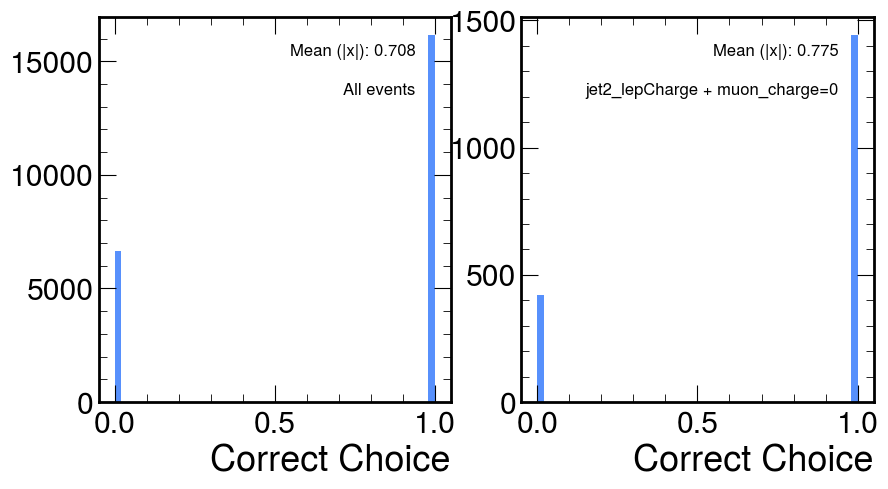

In [135]:
fileNames = glob.glob("/pnfs/psi.ch/cms/trivcat/store/user/gcelotto/bb_ntuples/genMatched/GluGlu*.parquet")
df = pd.read_parquet(fileNames)
#df = df[(df.jet1_pt>20) & (df.jet2_pt>20)]

fig, ax = plt.subplots(1, 2, figsize=(10,5))
bins=np.linspace(0, 1, 51)
ax[0].hist(df.correctChoice, bins=bins)
ax[0].text(x=0.9,y=0.9, s="Mean (|x|): %.3f"%(abs(df.correctChoice).mean()), ha='right', transform=ax[0].transAxes, fontsize=12)
ax[0].text(x=0.9,y=0.8, s="All events", ha='right', transform=ax[0].transAxes, fontsize=12)
ax[0].set_xlabel("Correct Choice")

ax[1].hist(df.correctChoice[(df.jet2_leptonicCharge + df.muon_charge)==0], bins=bins)
ax[1].text(x=0.9,y=0.9, s="Mean (|x|): %.3f"%((df.correctChoice[(df.jet2_leptonicCharge + df.muon_charge)==0]).mean()), ha='right', transform=ax[1].transAxes, fontsize=12)
ax[1].text(x=0.9,y=0.8, s="jet2_lepCharge + muon_charge=0", ha='right', transform=ax[1].transAxes, fontsize=12)
ax[1].set_xlabel("Correct Choice")

/work/gcelotto/miniconda3/envs/myenv/lib/python3.9/site-packages/matplotlib/axes/_axes.py:7001: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  m, bins = np.histogram(x[i], bins, weights=w[i], **hist_kwargs)


Text(1, 0, 'Correct Choice')

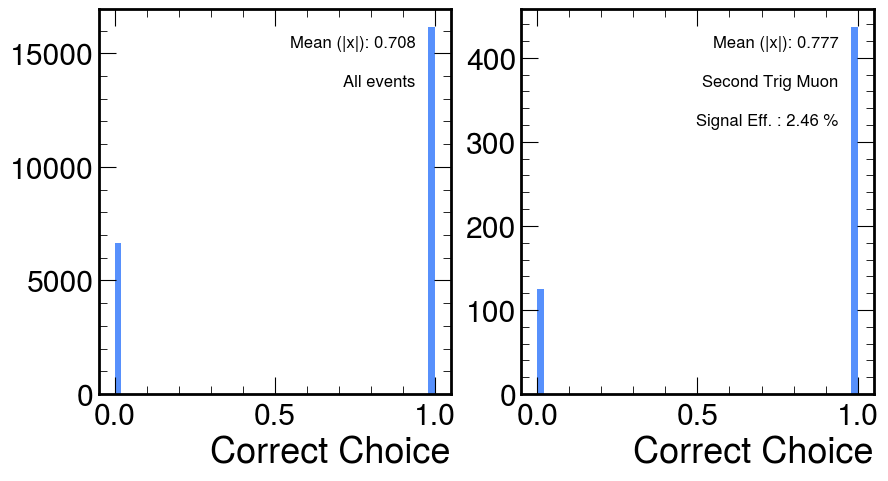

In [136]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
bins=np.linspace(0, 1, 51)
ax[0].hist(df.correctChoice, bins=bins)
ax[0].text(x=0.9,y=0.9, s="Mean (|x|): %.3f"%(abs(df.correctChoice).mean()), ha='right', transform=ax[0].transAxes, fontsize=12)
ax[0].text(x=0.9,y=0.8, s="All events", ha='right', transform=ax[0].transAxes, fontsize=12)
ax[0].set_xlabel("Correct Choice")

ax[1].hist(df.correctChoice[abs(df.muon2_charge)==1], bins=bins)
ax[1].text(x=0.9,y=0.9, s="Mean (|x|): %.3f"%((df.correctChoice[abs(df.muon2_charge)==1]).mean()), ha='right', transform=ax[1].transAxes, fontsize=12)
ax[1].text(x=0.9,y=0.8, s="Second Trig Muon", ha='right', transform=ax[1].transAxes, fontsize=12)
ax[1].text(x=0.9,y=0.7, s="Signal Eff. : %.2f %%"%((abs(df.muon2_charge)==1).sum()*100/len(df)), ha='right', transform=ax[1].transAxes, fontsize=12)
ax[1].set_xlabel("Correct Choice")